# I. Understanding Iris data

The Iris dataset is a classic dataset in the field of machine learning and statistics.

The dataset consists of 150 samples from each of three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the lengths and the widths of the sepals and petals. These are the numeric, predictive attributes of the dataset.

The class attribute (the species of Iris) is nominal and includes three categories:

- Iris Setosa 
- Iris Versicolour
- Iris Virginica

This dataset was introduced by British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems". The data is often used in data mining, classification and clustering examples and to test algorithms.

For your reference, here are pictures of the three flowers species:

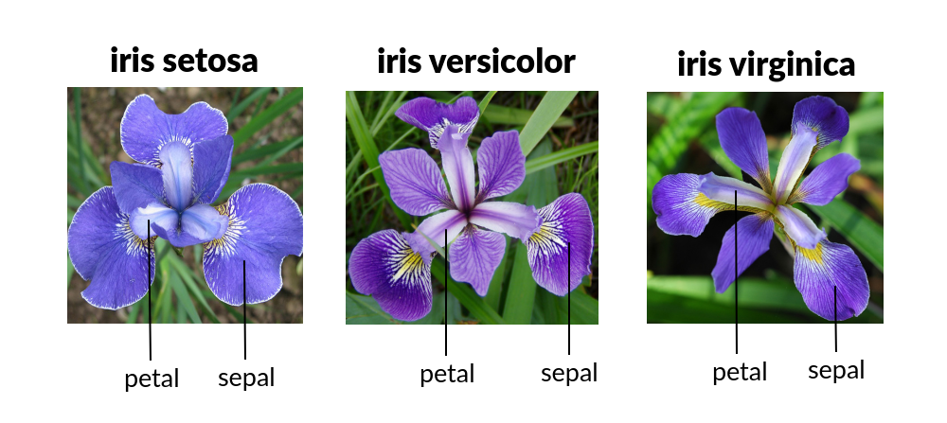

## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets # Importing the sklearn.datasets module where the iris data is stocked

## Step 1: Loading the Data

Load the Iris dataset from the sklearn.datasets module

In [4]:
# Load the iris data
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # Get features data
df['target'] = iris.target # Get target data

### Explore the iris data type and description

The iris data is stored as a **sklearn.utils.Bunch**

In [11]:
type(iris)

sklearn.utils.Bunch

- What is a sklearn.utils.Bunch ?

The **sklearn.utils.Bunch** is a data structure in the scikit-learn library that is used to represent datasets. It is a simple container that stores data in a dictionary-like format.

The **Bunch** object contains the following attributes:

- **data:** This attribute holds the actual data points of the dataset. It is usually a 2-dimensional array-like structure, where each row represents an individual sample and each column represents a specific feature or attribute of that sample.

- **target:** This attribute stores the target values or labels associated with each data point. It is typically a 1-dimensional array-like structure that corresponds to the class or category of each sample in the dataset.

- **feature_names:** This attribute contains the names or labels of the features in the dataset. It is an optional attribute and may not be present in all Bunch objects.

- **target_names:** This attribute stores the names or labels of the target classes or categories. It is also an optional attribute and may not be present in all Bunch objects.

- **DESCR:** This attribute provides a description or summary of the dataset. It usually includes information about the dataset's source, usage, and other relevant details.

The **Bunch** object allows convenient access to the dataset's attributes using dot notation. 

For example, you can access the data using **bunch.data**, the target values using **bunch.target**, and so on.

Overall, the **sklearn.utils.Bunch** provides a standardized way to store and access datasets in scikit-learn, making it easier to work with and analyze the data.

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In this case, we can get features by iris.data and target by iris.target

## Step 2: Understanding the Data

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


You should see a table with 5 columns: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', and 'target'. The first four columns are features that describe the properties of the Iris flower. The 'target' column is the label that we want to predict - it represents the species of the Iris flower.

In [18]:
# Checking the unique value of the target
df.target.unique()

array([0, 1, 2])

In [9]:
# we can get target name with the key 'target_names' predefined in the iris dataset in sklearn
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The dataset contains measurements of sepal length and width, and petal length and width of Iris flowers. 

The target variable is the species of the Iris flower, represented by an integer :
- 0 : Iris Setosa
- 1 : Iris Versicolour
- 2 : Iris Virginica

## Step 3: Visualizing the Data

To better understand the relationships in the data, we can use visualizations. A pairplot can help us see the relationships between pairs of features.

This will create a matrix of scatter plots. Each scatter plot shows the relationship between two features, with different colors representing different species of Iris. You can observe how different species cluster differently based on these features.

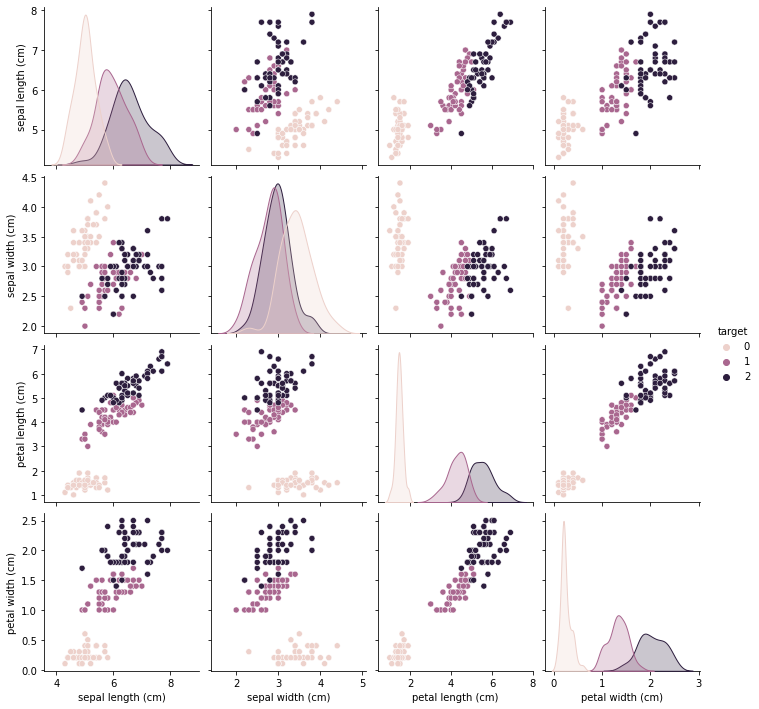

In [12]:
sns.pairplot(df, hue='target')
plt.show()

The pairplot is a great tool to visualize the distribution and relationship between different pairs of features. Here's what you might notice:

- The distributions along the diagonal of the pairplot show that some features, like petal length and petal width, can help distinguish between Iris species quite well. The Iris-setosa (represented by 0) tends to have smaller petal lengths and widths than the other two species.

- The scatter plots off the diagonal allow us to see the relationships between two different features. For example, there's a clear correlation between petal length and petal width: as one increases, so does the other.

- Certain combinations of features cluster the Iris species better. For instance, when you look at the scatter plot of petal length against petal width, the Iris-setosa species is distinctly separated from the other two.


## Step 4: Discussion

- What do you notice about the relationships between different pairs of features?

- How does the distribution of data points differ between different species of Iris?

- Can you guess which features might be most useful for predicting the species of an Iris?

Based on the pairplot, the features that show the clearest distinctions between species are petal length and petal width. These features might be the most useful for predicting the species of an Iris flower.

The relationships between pairs of features are not always linear. Some pairs show a more complex relationship, and these could be harder to model with certain types of machine learning algorithms.

Iris-setosa tends to have smaller petals compared to the other species, making it easier to distinguish using petal measurements.

Iris-versicolor and Iris-virginica seem more difficult to tell apart based on the given features, as their measurements overlap quite a bit. This overlap may present a challenge when we try to build a machine learning model.


# II. Building a Machine Learning Model 

## 1. Classification : Decision Tree Model

#### **Context**

Let's assume you are a botanist seeking an automated way to categorize each Iris flower you discover. Machine learning provides many algorithms to classify flowers statistically. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest – we're going to classify Iris flowers based on the length and width measurements of their sepals and petals.

The Iris genus entails about 300 species, but our program will only classify the following three:

- Iris setosa
- Iris virginica
- Iris versicolor

### 1. Import necessary libraries and modules

The code begins by importing necessary libraries and modules for the task. (It's a best practice)

In [13]:
from sklearn import datasets # To load the iris dataset
from sklearn.tree import DecisionTreeClassifier # For the decision tree model
from sklearn.model_selection import train_test_split # To split data into training set and test set
from sklearn.metrics import accuracy_score # to get score of the decision tree model

### 2. Load iris dataset

The Iris dataset is loaded directly from scikit-learn's datasets.

In [17]:
iris = datasets.load_iris()

### 3. Separate the features and the target 

The dataset is split into two parts: the features (X) and the target (y). 

The features are the characteristics of the Iris flowers, like petal width and sepal length. 

The target is the specific species of Iris that the row of data is categorized as.

In [19]:
X = iris.data 
y = iris.target 

In [18]:
# Checking the size of data
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### 4. Split the dataset into training set and test set

In supervised learning, the dataset is split into two separate sets: **the training set** and **the test set**.

The training set is what we will feed into the classifier so that it can learn and make predictions. Used to train the model.

The test set will be used to evaluate the accuracy of those predictions. Used to evaluate the model performance.

In this case, 70% of the data goes to the training set and 30% goes to the test set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) # 80% training and 20% test

In [21]:
# Checking the size of each element
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### 5. Create the Decision Tree classifier

A Decision Tree classifier is chosen to classify the Iris species. We're creating an instance of the DecisionTreeClassifier class.

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

### 6. Train the classifier

The classifier is trained using the fit function and using the training data and the corresponding labels.

In [23]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

### 7. Make predictions on the test set

The classifier is used to predict the species of the test set Iris flowers.

In [24]:
# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [33]:
# Checking the prediction
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

### 8. Evaluate the accuracy of the classifier

The predictions made by the classifier on the test set are compared to the actual species of the test set Iris flowers. This shows how often the classifier is correct.

In [26]:
# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


## 2. Clustering : K-means

### **Context**

Assume you're an ecologist studying different species of Iris flowers in the wild. You have collected measurements related to various Iris flowers' physical characteristics, but due to some limitations, you couldn't record the species of each flower.

You are aware that there are three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor) in your collected data. You want to classify these unlabelled observations into distinct species based on the similarity of their physical characteristics such as sepal length, sepal width, petal length, and petal width.

### 1. Importing necessary libraries and modules

In [5]:
#from sklearn import datasets # to load the iris data
from sklearn.cluster import KMeans # For Kmeans model
#import matplotlib.pyplot as plt # For cluster visualization

These lines import the necessary Python libraries. 
- **datasets** is part of sklearn and contains the Iris dataset we're using. 
- **KMeans** is the clustering algorithm we'll use.
- **matplotlib.pyplot** is a plotting library used for creating graphs.

### 2. Loading the dataset and defining features

Load the Iris dataset from ***sklearn.datasets*** and separate out the features (sepal length, sepal width, petal length, petal width) into **X**.

In [6]:
iris = datasets.load_iris() # Load the iris data
X = iris.data # Defining features

### 3. Creating the KMeans model

Creating a KMeans clustering model intending to find 3 clusters (as we know there are three different species of Iris flowers)

In [7]:
# Create KMeans object
kmeans = KMeans(n_clusters=3, random_state=0)

### 4. Fitting KMeans model

The **fit** function is used to compute k-means clustering.

In [8]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

### 5. Predicting the Cluster for Each Data Point

This line uses our fitted model to predict the cluster each data point belongs to.

In [9]:
# Get the cluster assignments for each data point
y_kmeans = kmeans.predict(X)

In [10]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### 6.Clusters visualization

We will use two features for simplicity, sepal length and sepal width, to make a 2D plot :

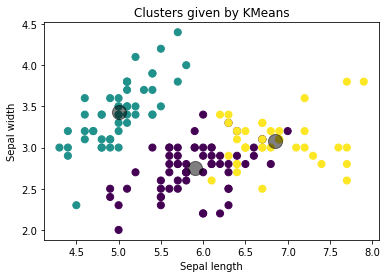

In [12]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Clusters given by KMeans')
plt.show()

In the KMeans example, the model is unsupervised and thus doesn't use the labels (y) when fitting. It's using the features (X) to find structure in the data. The final plot shows the clusters found by KMeans, and their centers.

## Visualizes the true labels of the Iris species with the clusters predicted by the KMeans model.

In the data understanding section, we found that petal length and petal width are the features that show the clearest distinctions between species. 

So we will use these two features to compare the true Iris species labels and the groups predicted by the K-Means model.

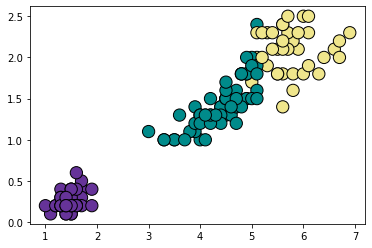

In [27]:
colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}
plt.scatter(X[:, 2], X[:, 3], c=pd.Series(y_kmeans).map(colors),
            edgecolor='k', s=150)

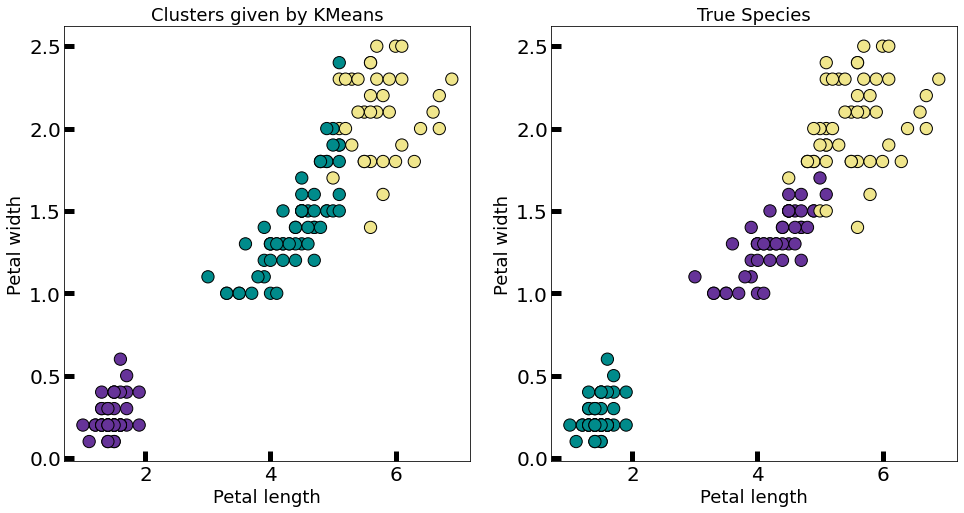

In [28]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the identified clusters and compare with the answers

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Creating the First Subplot:
axes[0].scatter(X[:, 2], X[:, 3], c=pd.Series(y_kmeans).map(colors),
            edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clusters given by KMeans', fontsize=18)
# This chunk of code creates a scatter plot of the data points, 
# colored by the predicted cluster from KMeans. The axes are labeled and the title of the graph is set.

# Creating the Second Subplot
axes[1].scatter(X[:, 2], X[:, 3], c=pd.Series(y).map(colors),
            edgecolor='k', s=150)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('True Species', fontsize=18)
# This chunk of code creates another scatter plot of the data points, 
# this time colored by their actual species. Again, the axes are labeled and the title of the graph is set.

plt.show()

This script creates two plots side by side. The left plot shows the clustering result from KMeans, while the right plot shows the actual species. 

You can see how well the KMeans algorithm was able to match the true species groups.

**Note:** The group numbers assigned in clustering are arbitrary and do not carry any inherent meaning. It is important to understand that the groups themselves are what matter, not their specific numbering or representation. The main focus should be on the patterns, relationships, and characteristics within each group, rather than the specific label assigned to them.